In [5]:
import pandas as pd
from bisect import bisect
import numpy as np
import eddington
from matplotlib import pyplot as plt
import matplotlib as mpl
from scipy.interpolate import CubicSpline
plt.rcParams['figure.figsize'] = [10,7.5]
plt.rcParams.update({'font.size': 18, 'font.weight':'bold'})
plt.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

In [6]:
def equaliser(x,y,nun):
    eq_x = np.linspace(x[0],x[-1],nun)
    eq_y = []
    for point in eq_x:
        i = bisect(x,point)
        if i == len(x):
            eq_y.append(y[i-1])
            continue
        eq_y.append((y[i]-y[i-1])/(x[i]-x[i-1])*(point-x[i-1]) + y[i-1]) 
        # an interpolation function can be written instead to use more advanced interpolation methods
    return [eq_x , eq_y]

def avg(y):
    return sum(y)/len(y)

def findPeaks(x,y, maxPik, minDis, win=2):
    peaks = []
    for i in range(win,len(y)-win):
        pik = True
        for j in range(1,win):
            if y[i-j] > y[i-j+1] or y[i+j] > y[i+j-1]:
                pik = False
                break
                
        if pik:
            peaks.append(i)
        
    for j in range(10):
        i=0
        while i < len(peaks)-1:
            rm = False
            if y[peaks[i]] < maxPik or \
            y[peaks[i]]<y[peaks[i+1]]/2 or \
            x[peaks[i+1]]-x[peaks[i]]<minDis*(x[peaks[i]+3]-x[peaks[i]])/2.5 or \
            peaks[i+1]-peaks[i] < minDis:
                rm = True
            
            if rm:
                if y[peaks[i+1]]>y[peaks[i]]:
                    peaks[i] = None
                else:
                    peaks[i+1] = None
                    i+=1
            i+=1

        while None in peaks: peaks.remove(None)
    
    dist = [x[peaks[i+1]]-x[peaks[i]] for i in range(len(peaks)-1)]
    
    i=0
    while i<len(dist):
        if dist[i]>1.2*avg(dist):
            break
        i+=1
        
    peaks = peaks[:i+1]
    peaks = np.array([[x[i],y[i]] for i in peaks]).T
    return peaks

def printFloat(lst):
    printed = '['
    for item in lst[:-1]:
        printed += f'{item:.4f}, '
    printed += f'{lst[-1]:.4f}]'
    return printed

In [7]:
files = ["B=5.5to0_T=4.2_Vg=0.5.xlsx","B=0to5.5_T=4.2_Vg=0.xlsx","B=0to5.5_T=4.2_Vg=-0.5.xlsx",
         "B=0to5.5_T=1.7_Vg=0.5.xlsx", "B=5.5to0_T=1.7_Vg=0.xlsx", "B=0to5.5_T=1.7_Vg=-0.5.xlsx"]
minField = 0.5
data = [pd.read_excel(file) for file in files]
directions = [int(np.sign(df['Field 1 '][1]-df['Field 1 '][0])) for df in data]
dataxy = [[data[i]['Field 1 '][data[i]['Field 1 ']>minField].to_list(),data[i]['SR510 No. 2 (Ohm}'][data[i]['Field 1 ']>minField].to_list()] for i in range(len(data))]
data = [[data[i]['Field 1 '][data[i]['Field 1 ']>minField].to_list(),data[i]['SR510 No. 1 (Ohm}'][data[i]['Field 1 ']>minField].to_list()] for i in range(len(data))]
data = [np.array([data[i][0][::directions[i]],data[i][1][::directions[i]]]) for i in range(len(data))]
dataxy = [np.array([dataxy[i][0][::directions[i]],dataxy[i][1][::directions[i]]]) for i in range(len(dataxy))]
names = [r'$\text{V}_{\text{g}}$=0.5 [Volt], T=4.2 [Kelvin]',
         r'$\text{V}_{\text{g}}$=0 [Volt], T=4.2 [Kelvin]',
         r'$\text{V}_{\text{g}}$=-0.5 [Volt], T=4.2 [Kelvin]',
         r'$\text{V}_{\text{g}}$=0.5 [Volt], T=1.7 [Kelvin]',
         r'$\text{V}_{\text{g}}$=0 [Volt], T=1.7 [Kelvin]',
         r'$\text{V}_{\text{g}}$=-0.5 [Volt], T=1.7 [Kelvin]']
filenames = ['Vg=0.5_T=4.2','Vg=0_T=4.2','Vg=-0.5_T=4.2','Vg=0.5_T=1.7','Vg=0_T=1.7','Vg=-0.5_T=1.7']

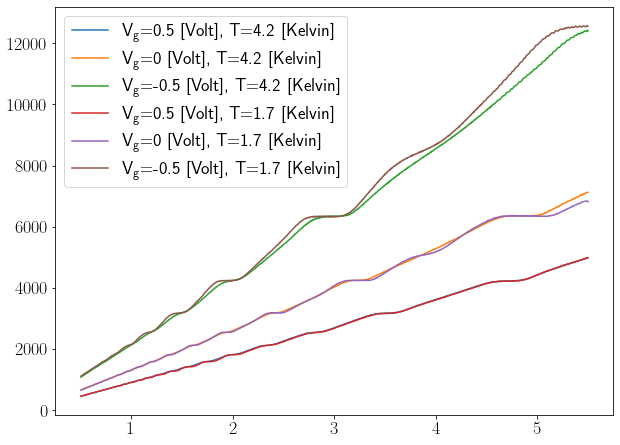

In [8]:
minn = min([min(df[1]) for df in data])
maxx = max([len(df[1]) for df in data])
d = 5/maxx
oneOver = []

# data = np.array([equaliser(df[0],df[1]-min(df[1])+minn,maxx) for df in data])
data = np.array([equaliser(df[0],df[1],maxx) for df in data])

for i in range(len(data)):
    plt.plot(dataxy[i][0],dataxy[i][1], label=names[i])

plt.legend()
plt.show()

[0.0588, 0.0678, 0.0719, 0.0682, 0.0707, 0.0723, 0.0710, 0.0716, 0.0711, 0.0706, 0.0720, 0.0708, 0.0662, 0.0754]
Delta-1/B=0.0698767\pm0.0002673 (0.3825%)
n/10**15=6.9207311\pm0.0264744


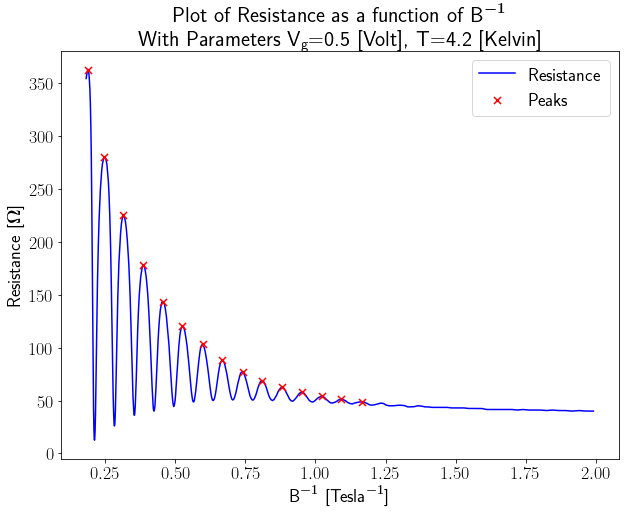

[0.1046, 0.1013, 0.1015, 0.1044, 0.1018, 0.1018, 0.1068, 0.1048, 0.1015, 0.1004, 0.1061]
Delta-1/B=0.1031685\pm0.0001910 (0.1851%)
n/10**15=4.6874558\pm0.0086779


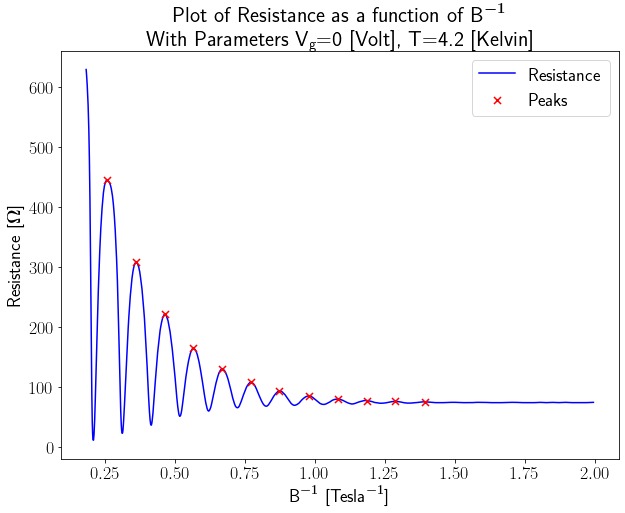

[0.1753, 0.1732, 0.1665, 0.1590, 0.1500]
Delta-1/B=0.1647982\pm0.0018671 (1.1330%)
n/10**15=2.9344845\pm0.0332469


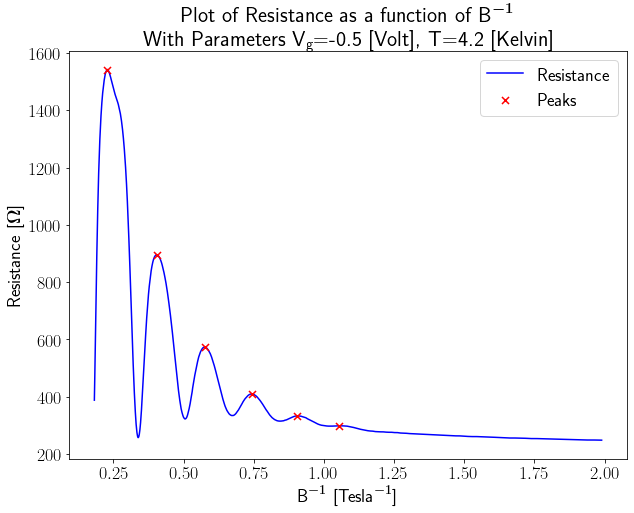

[0.0601, 0.0642, 0.0718, 0.0686, 0.0736, 0.0725, 0.0713, 0.0720, 0.0715, 0.0659, 0.0656, 0.0694, 0.0725]
Delta-1/B=0.0691446\pm0.0003002 (0.4342%)
n/10**15=6.9940092\pm0.0303671


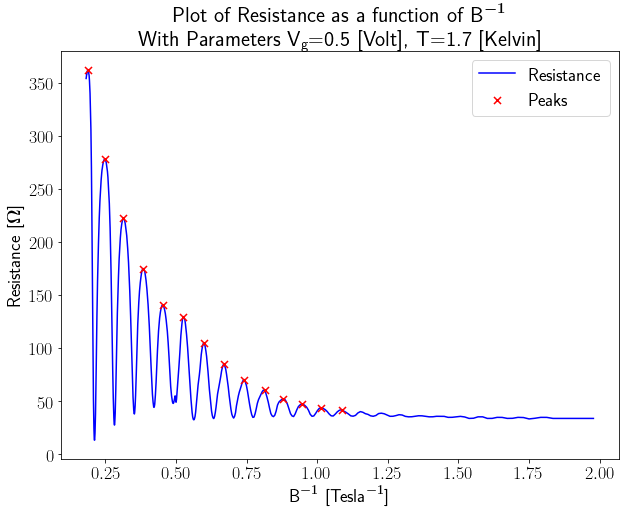

[0.0384, 0.0855, 0.0993, 0.1032, 0.1047, 0.1022, 0.1022, 0.1010, 0.1039, 0.1098, 0.1010, 0.1067]
Delta-1/B=0.0964887\pm0.0015328 (1.5886%)
n/10**15=5.0119623\pm0.0796189


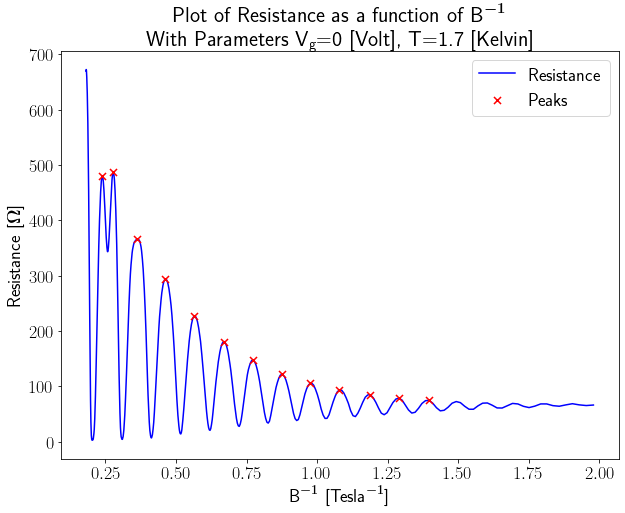

[0.0624, 0.1264, 0.1730, 0.1735, 0.1730, 0.1775, 0.1685, 0.1573, 0.1337]
Delta-1/B=0.1494748\pm0.0039289 (2.6285%)
n/10**15=3.2353142\pm0.0850401


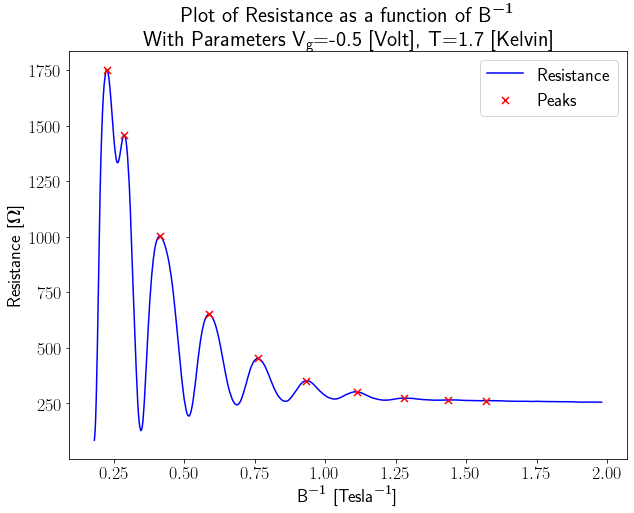

In [9]:
oneOver = [[1/x for x in df[0]][::-1] for df in data]
Rk=25812.807
hOverE = Rk*1.602176634*10**(-19)
for i in range(len(data)):
    plt.plot(oneOver[i],data[i][1][::-1], label='Resistance', zorder=0, c='b')
    peaks = findPeaks(oneOver[i], data[i][1][::-1], avg(data[i][1][::-1])/10, 7, win=2)
    df = pd.DataFrame(peaks.T, columns=['x','y'])
    df.to_excel(f'Peaks/{filenames[i]}_Peaks.xlsx')
    dist = [peaks[0][i+1]-peaks[0][i] for i in range(len(peaks[0])-1)]
    print(printFloat(dist))
    d=avg(dist)
    dd=np.std(dist)/len(dist)
    print(f'Delta-1/B={d:.7f}\pm{dd:.7f} ({dd/d*100:.4f}%)')
    n = 2/(d*hOverE)
    print(f'n/10**15={n/(10**15):.7f}\pm{dd/d*n/(10**15):.7f}')
    plt.scatter(peaks[0], peaks[1], label='Peaks', zorder=1, c='r', marker='x',s=50)
    plt.title(r'Plot of Resistance as a function of $\text{B}^{\boldsymbol{-1}}$'+f'\nWith Parameters {names[i]}')
    plt.ylabel(r'Resistance [$\boldsymbol{\Omega}$]')
    plt.xlabel(r'$\text{B}^{\boldsymbol{-1}}$ [$\text{Tesla}^{\boldsymbol{-1}}$]')
    plt.legend()
    plt.savefig(f'Peaks/Peaks_{filenames[i]}.png')
    plt.show()

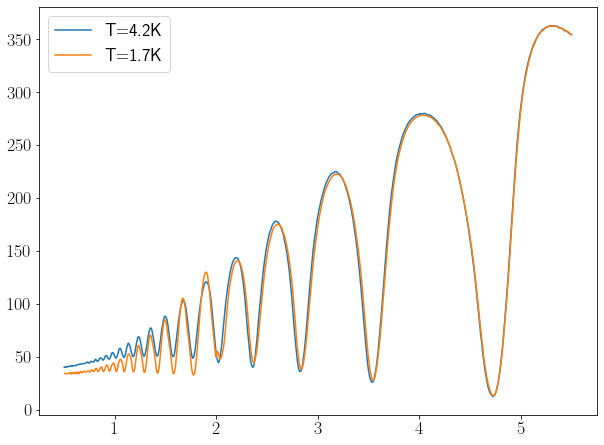

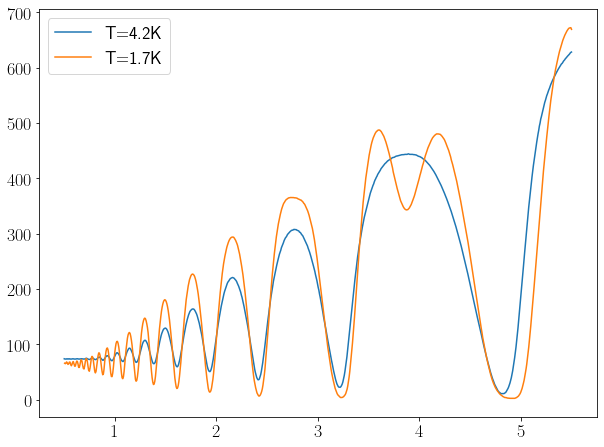

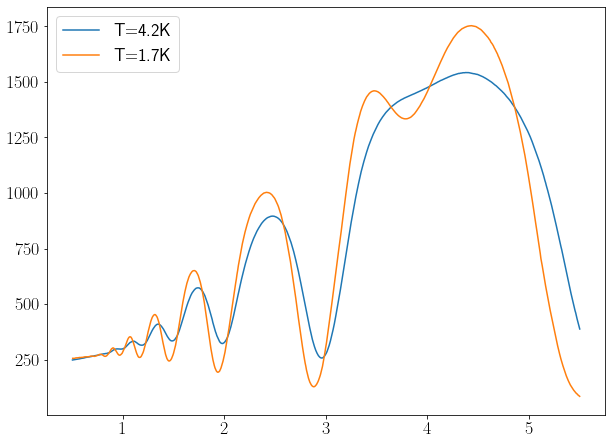

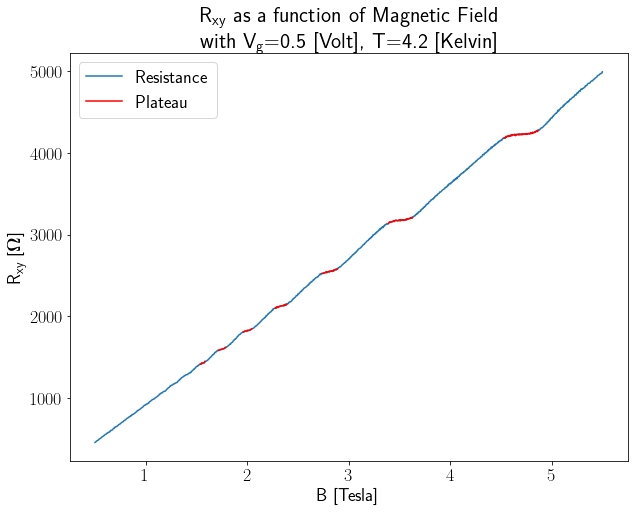

[18.0588, 16.1204, 14.1274, 12.1424, 10.1202, 8.1286, 6.1087] 7


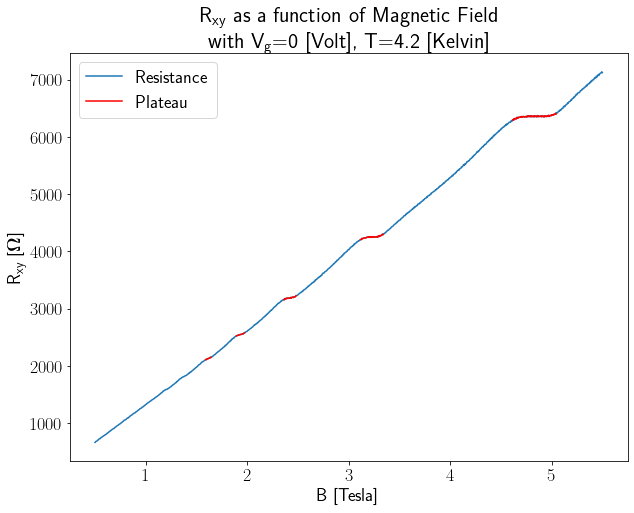

[12.1187, 10.1257, 8.0938, 6.0732, 4.0623] 5


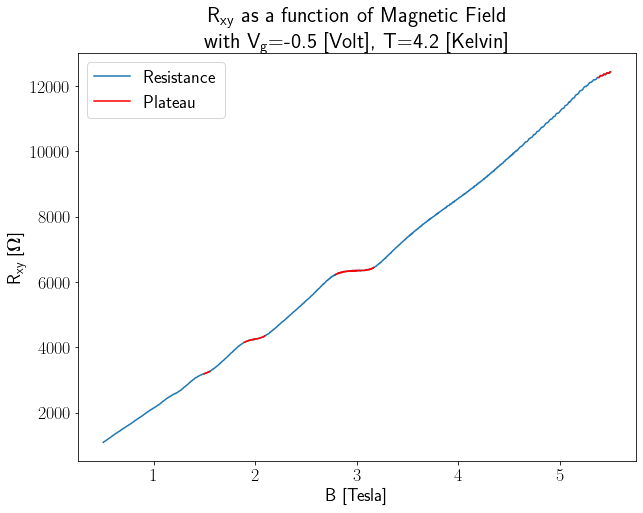

[8.0109, 6.0831, 4.0755, 2.0902] 4


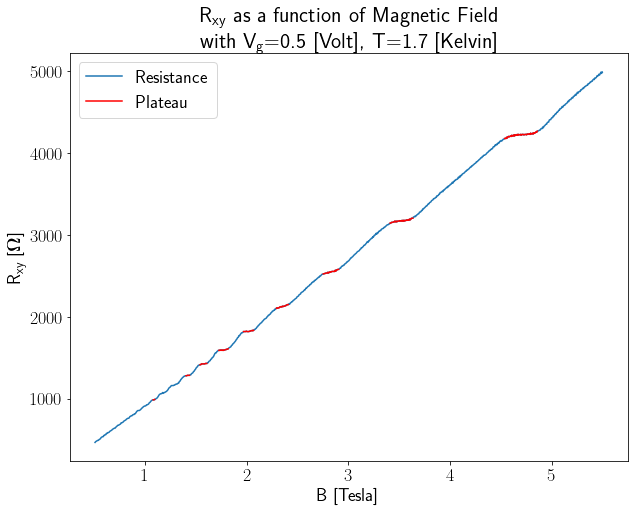

[30.1904, 26.1616, 24.0119, 22.2524, 20.1139, 18.1200, 16.1701, 14.1464, 12.1397, 10.1227, 8.1326, 6.1116] 12


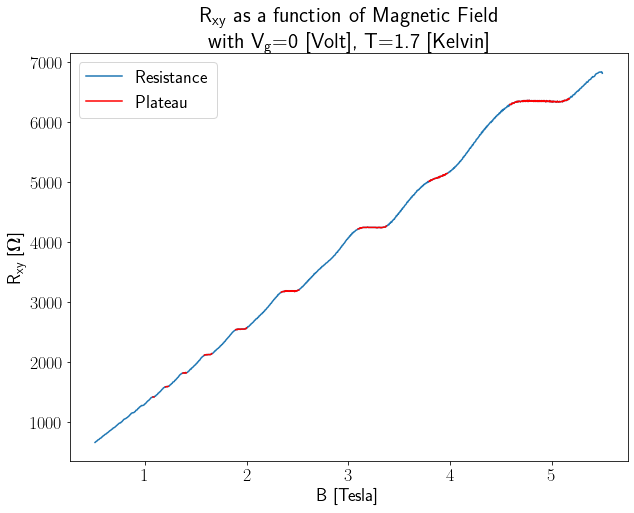

[20.1663, 18.1143, 16.1836, 14.1505, 12.1211, 10.1040, 8.0955, 6.0756, 5.0772, 4.0637] 10


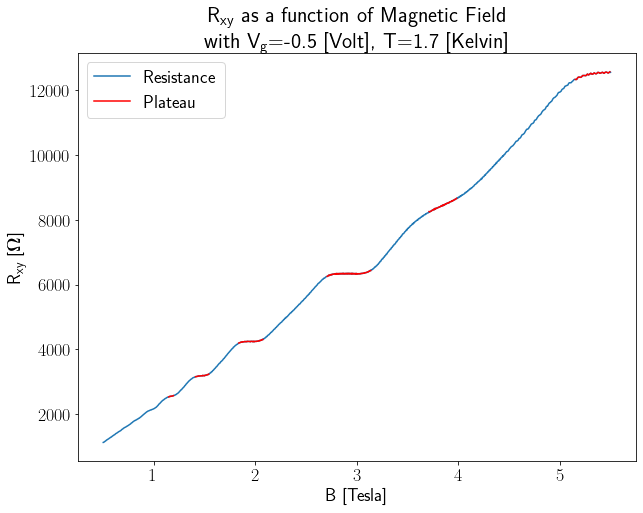

[10.1152, 8.0978, 6.0790, 4.0712, 3.0553, 2.0662] 6


In [18]:
snopes = [[[],[]], [[],[]], [[],[]], [[],[]], [[],[]], [[],[]]]
restrict = [[0, 1.5, 2, 0.5, 3], [1.5, 3.5, 3, 0.82, 5], [3.5, 6, 4, 0.82, 15]]
# Region based restrictions [from, to, cont factor, slope factor, window size]

for i in range(len(dataxy)):
    overallData = eddington.FittingData(dict(x = dataxy[i][0], dx = dataxy[i][0]*0.025,
                                             y = dataxy[i][1], dy = dataxy[i][1]*0.025))
    oaRe = eddington.fit(overallData, eddington.linear)
    streak = 0
    cont = restrict[0][2] # First cont factor
    factor = restrict[0][3] # First slope factor
    win = restrict[0][4] # First window
    j = win
    while j < len(dataxy[i][0])-win:
        for region in restrict:
            if region[0] <= dataxy[i][0][j] and dataxy[i][0][j] <= region[1]:
                cont = region[2]
                factor = region[3]
                win = region[4]
        currData = eddington.FittingData(dict(x = dataxy[i][0][j-win:j+win], dx = dataxy[i][0][j-win:j+win]*0.025,
                                              y = dataxy[i][1][j-win:j+win], dy = dataxy[i][1][j-win:j+win]*0.025))
        currRe = eddington.fit(currData, eddington.linear)
#         print(currRe.a[1] < factor*oaRe.a[1], streak)
        if currRe.a[1] < factor*oaRe.a[1] and streak == 0:
            streak = cont
            snopes[i][0].append(j)
            
        if currRe.a[1] > factor*oaRe.a[1] and streak <= cont and streak > 1:
            streak -= 1
        
        elif currRe.a[1] < factor*oaRe.a[1] and streak < cont:
            streak = cont
        
        elif currRe.a[1] > factor*oaRe.a[1] and streak == 1:
            streak = 0
            snopes[i][1].append(j-cont+1)
        j+=1
    if len(snopes[i][0]) != len(snopes[i][1]):
        diff = cont-streak
        snopes[i][1].append(len(dataxy[i][0])-1-diff)
        
pRes=[[],[],[],[],[],[]]
dpRes=[[],[],[],[],[],[]]
neu=[[],[],[],[],[],[]]
dneu=[[],[],[],[],[],[]]
for i in range(len(snopes)):
    plt.plot(dataxy[i][0],dataxy[i][1],zorder=0)
#     plt.plot(dataxy[i][0],dataxy[i][1], c='k',zorder=0)
    for j in range(len(snopes[i][0])):
        start = snopes[i][0][j]
        end = snopes[i][1][j]
        plt.plot(dataxy[i][0][start:end],dataxy[i][1][start:end], c='r', zorder=1)
        pRes[i].append(sum(dataxy[i][1][start:end])/(end-start))
        if np.std(dataxy[i][1][start:end])/(end-start):
            dpRes[i].append(np.std(dataxy[i][1][start:end])/(end-start))
        else:
            dpRes[i].append(0.001*sum(dataxy[i][1][start:end])/(end-start))
#         plt.plot(dataxy[i][0][start:end],dataxy[i][1][start:end], zorder=1)
    plt.title(r'$\text{R}_{\text{xy}}$ as a function of Magnetic Field' + '\n with '+names[i])
    plt.legend(['Resistance', 'Plateau'], loc='upper left')
    plt.ylabel(r'$\text{R}_{\text{xy}}$ [$\boldsymbol{\Omega}$]')
    plt.xlabel(r'B [Tesla]')
    plt.savefig(f'Plateaus/Plateau_' + filenames[i] + '.png')
    plt.show()
    neu[i] = np.array([Rk/res for res in pRes[i]])
    dneu[i] = np.array([neu[i][k]*dpRes[i][k]/pRes[i][k] for k in range(len(dpRes[i]))])
    pd.DataFrame(np.array([neu[i],dneu[i]]).T, columns=['neu', 'Δneu']).set_index('neu').to_excel(f'Plateaus/Plateau_{filenames[i]}.xlsx')
    print(printFloat(neu[i]),len(pRes[i]))


In [17]:
# This part is purely for fun :)

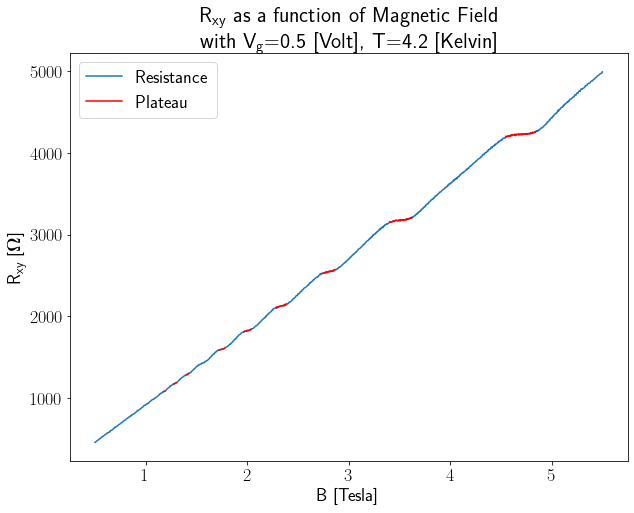

[27.9057, 26.0735, 23.8272, 21.8567, 19.9906, 18.0509, 16.1442, 14.1311, 12.1339, 10.1406, 8.1255, 6.1086] 12


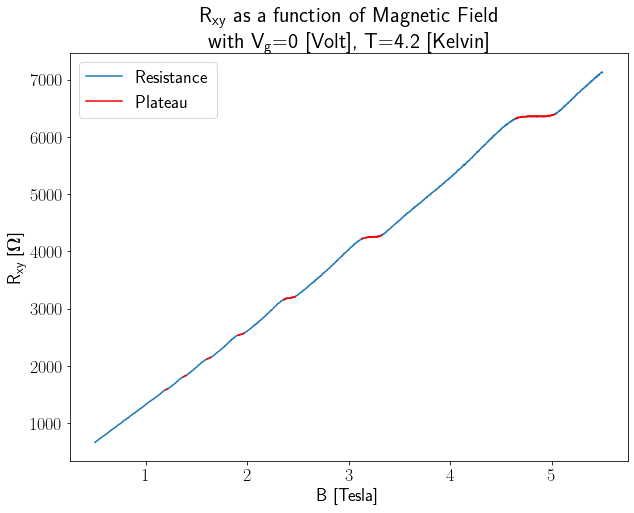

[16.2217, 14.1518, 12.0998, 10.1207, 8.0988, 6.0734, 4.0607] 7


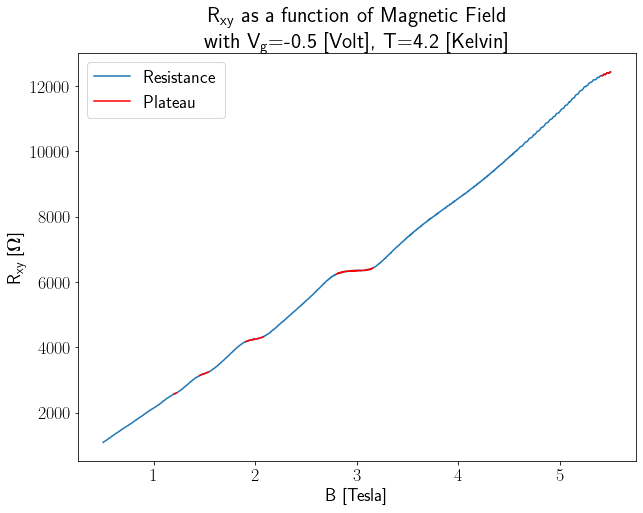

[9.9953, 8.3808, 8.1027, 6.0831, 4.0752, 2.0873] 6


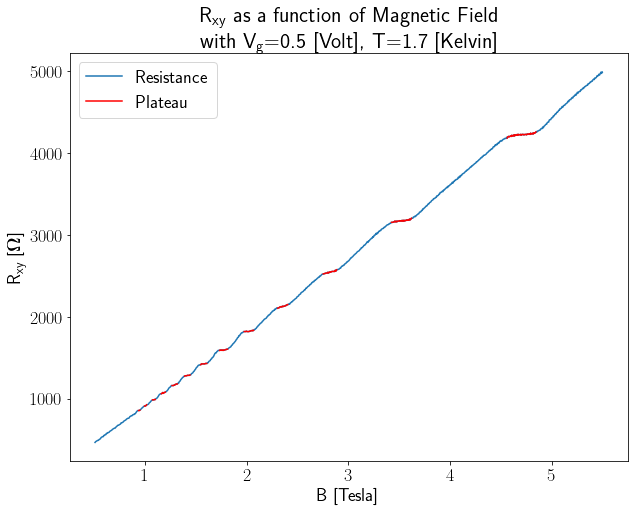

[52.6792, 40.3325, 37.9600, 32.2660, 30.1317, 28.2107, 26.1528, 24.1080, 22.0832, 20.1226, 18.1079, 16.1758, 14.1440, 12.1347, 10.1388, 8.1329, 6.1089] 17


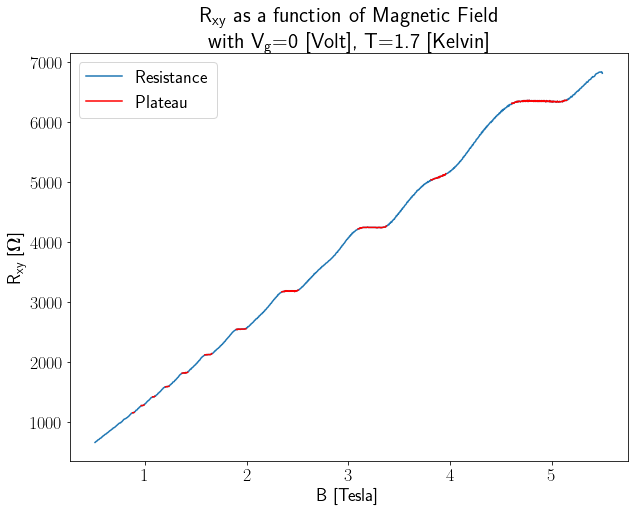

[24.2374, 22.2205, 20.1191, 18.0825, 16.1751, 14.1397, 12.1161, 10.1068, 8.0953, 6.0756, 5.0750, 4.0637] 12


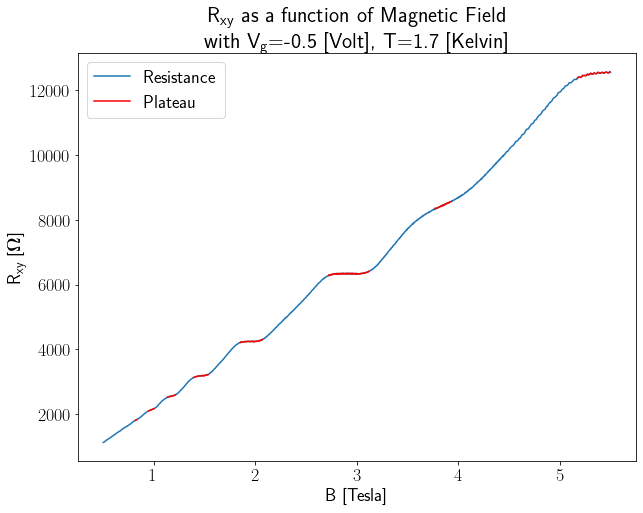

[16.0827, 14.2089, 12.0903, 10.0998, 8.1200, 6.0776, 4.0723, 3.0538, 2.0646] 9


In [11]:
pRes=[[],[],[],[],[],[]]
dpRes=[[],[],[],[],[],[]]
neu=[[],[],[],[],[],[]]
dneu=[[],[],[],[],[],[]]
for i in range(len(snopes)):
    plt.plot(dataxy[i][0],dataxy[i][1],zorder=0)
#     plt.plot(dataxy[i][0],dataxy[i][1], c='k',zorder=0)
    for j in range(len(snopes[i][0])):
        start = snopes[i][0][j]
        end = snopes[i][1][j]
        plt.plot(dataxy[i][0][start:end],dataxy[i][1][start:end], c='r', zorder=1)
        pRes[i].append(sum(dataxy[i][1][start:end])/(end-start))
        if np.std(dataxy[i][1][start:end])/(end-start):
            dpRes[i].append(np.std(dataxy[i][1][start:end])/(end-start))
        else:
            dpRes[i].append(0.001*sum(dataxy[i][1][start:end])/(end-start))
#         plt.plot(dataxy[i][0][start:end],dataxy[i][1][start:end], zorder=1)
    plt.title(r'$\text{R}_{\text{xy}}$ as a function of Magnetic Field' + '\n with '+names[i])
    plt.legend(['Resistance', 'Plateau'], loc='upper left')
    plt.ylabel(r'$\text{R}_{\text{xy}}$ [$\boldsymbol{\Omega}$]')
    plt.xlabel(r'B [Tesla]')
    plt.savefig(f'Plateaus/Plateau_' + filenames[i] + '.png')
    plt.show()
    neu[i] = np.array([Rk/res for res in pRes[i]])
    dneu[i] = np.array([neu[i][k]*dpRes[i][k]/pRes[i][k] for k in range(len(dpRes[i]))])
    pd.DataFrame(np.array([neu[i],dneu[i]]).T, columns=['neu', 'Δneu']).set_index('neu').to_excel(f'Plateaus/Plateau_{filenames[i]}.xlsx')
    print(printFloat(neu[i]),len(pRes[i]))


In [7]:
freq = np.fft.fftfreq(maxx,d)
fft = np.array([np.fft.fft(df) for df in oneOver])
absolute = np.array([np.fft.fft(df-sum(df)/maxx) for df in oneOver])

for i in range(len(fft)):
#     smoothFFT = CubicSpline(freq,np.abs(fft[i]))
#     fullFreq = np.linspace(freq[0],freq[-1],num=2500)
#     peaks = findPeaks(fullFreq,smoothFFT(fullFreq))
    plt.scatter(freq,absolute[i].imag, marker='.', c='b')
#     plt.plot(fullFreq,smoothFFT(fullFreq),c='b',zorder=-1)
#     plt.scatter(peaks[0],peaks[1], marker='x', c='r',zorder=1)
#     plt.xlim([0,10])
    print(np.argmax(absolute[i]))
    plt.title('FFT plot for the parameters:\n' + names[i])
    plt.savefig(f'FFT/FFT_' + filenames[i] + '.png')
    plt.show()